<a href="https://colab.research.google.com/github/yasminghd/2022_ML_Earth_Env_Sci/blob/main/Lab_Notebooks/S1_4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

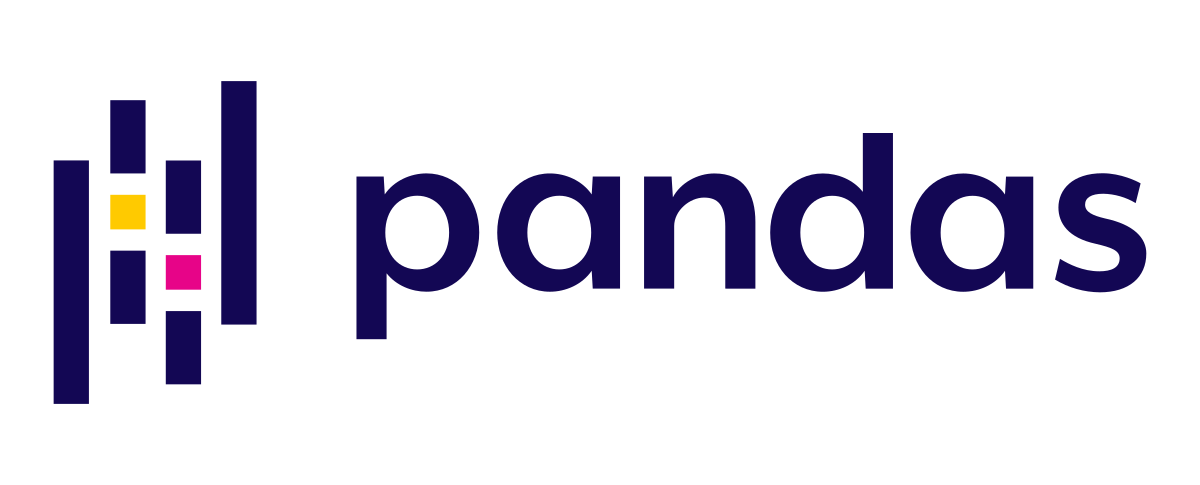

# Introduction

[Pandas](http://pandas.pydata.org/) is a an open source library providing high-performance, easy-to-use data structures and data analysis tools. Pandas is particularly suited to the analysis of *tabular* data, i.e. data that can can go into a table. In other words, if you can imagine the data in an Excel spreadsheet, then Pandas is the tool for the job.

A [2017 recent analysis](https://stackoverflow.blog/2017/09/06/incredible-growth-python/) of questions from Stack Overflow showed that python was the fastest growing and most widely used programming language in the world (in developed countries). As of 2021, the growth has now leveled off, but Python remains at the top.

SO_language_growth_2021.svg

[Link to generate your own version of this figure](https://insights.stackoverflow.com/trends?tags=java%2Cc%2Cc%2B%2B%2Cpython%2Cc%23%2Cvb.net%2Cjavascript%2Cassembly%2Cphp%2Cperl%2Cruby%2Cvb%2Cswift%2Cr%2Cobjective-c)

A [follow-up analysis](https://149351115.v2.pressablecdn.com/wp-content/uploads/2017/09/related_tags_over_time-1-2000x2000.png) showed that this growth is driven by the data science packages such as `numpy`, `matplotlib`, and especially `pandas`.

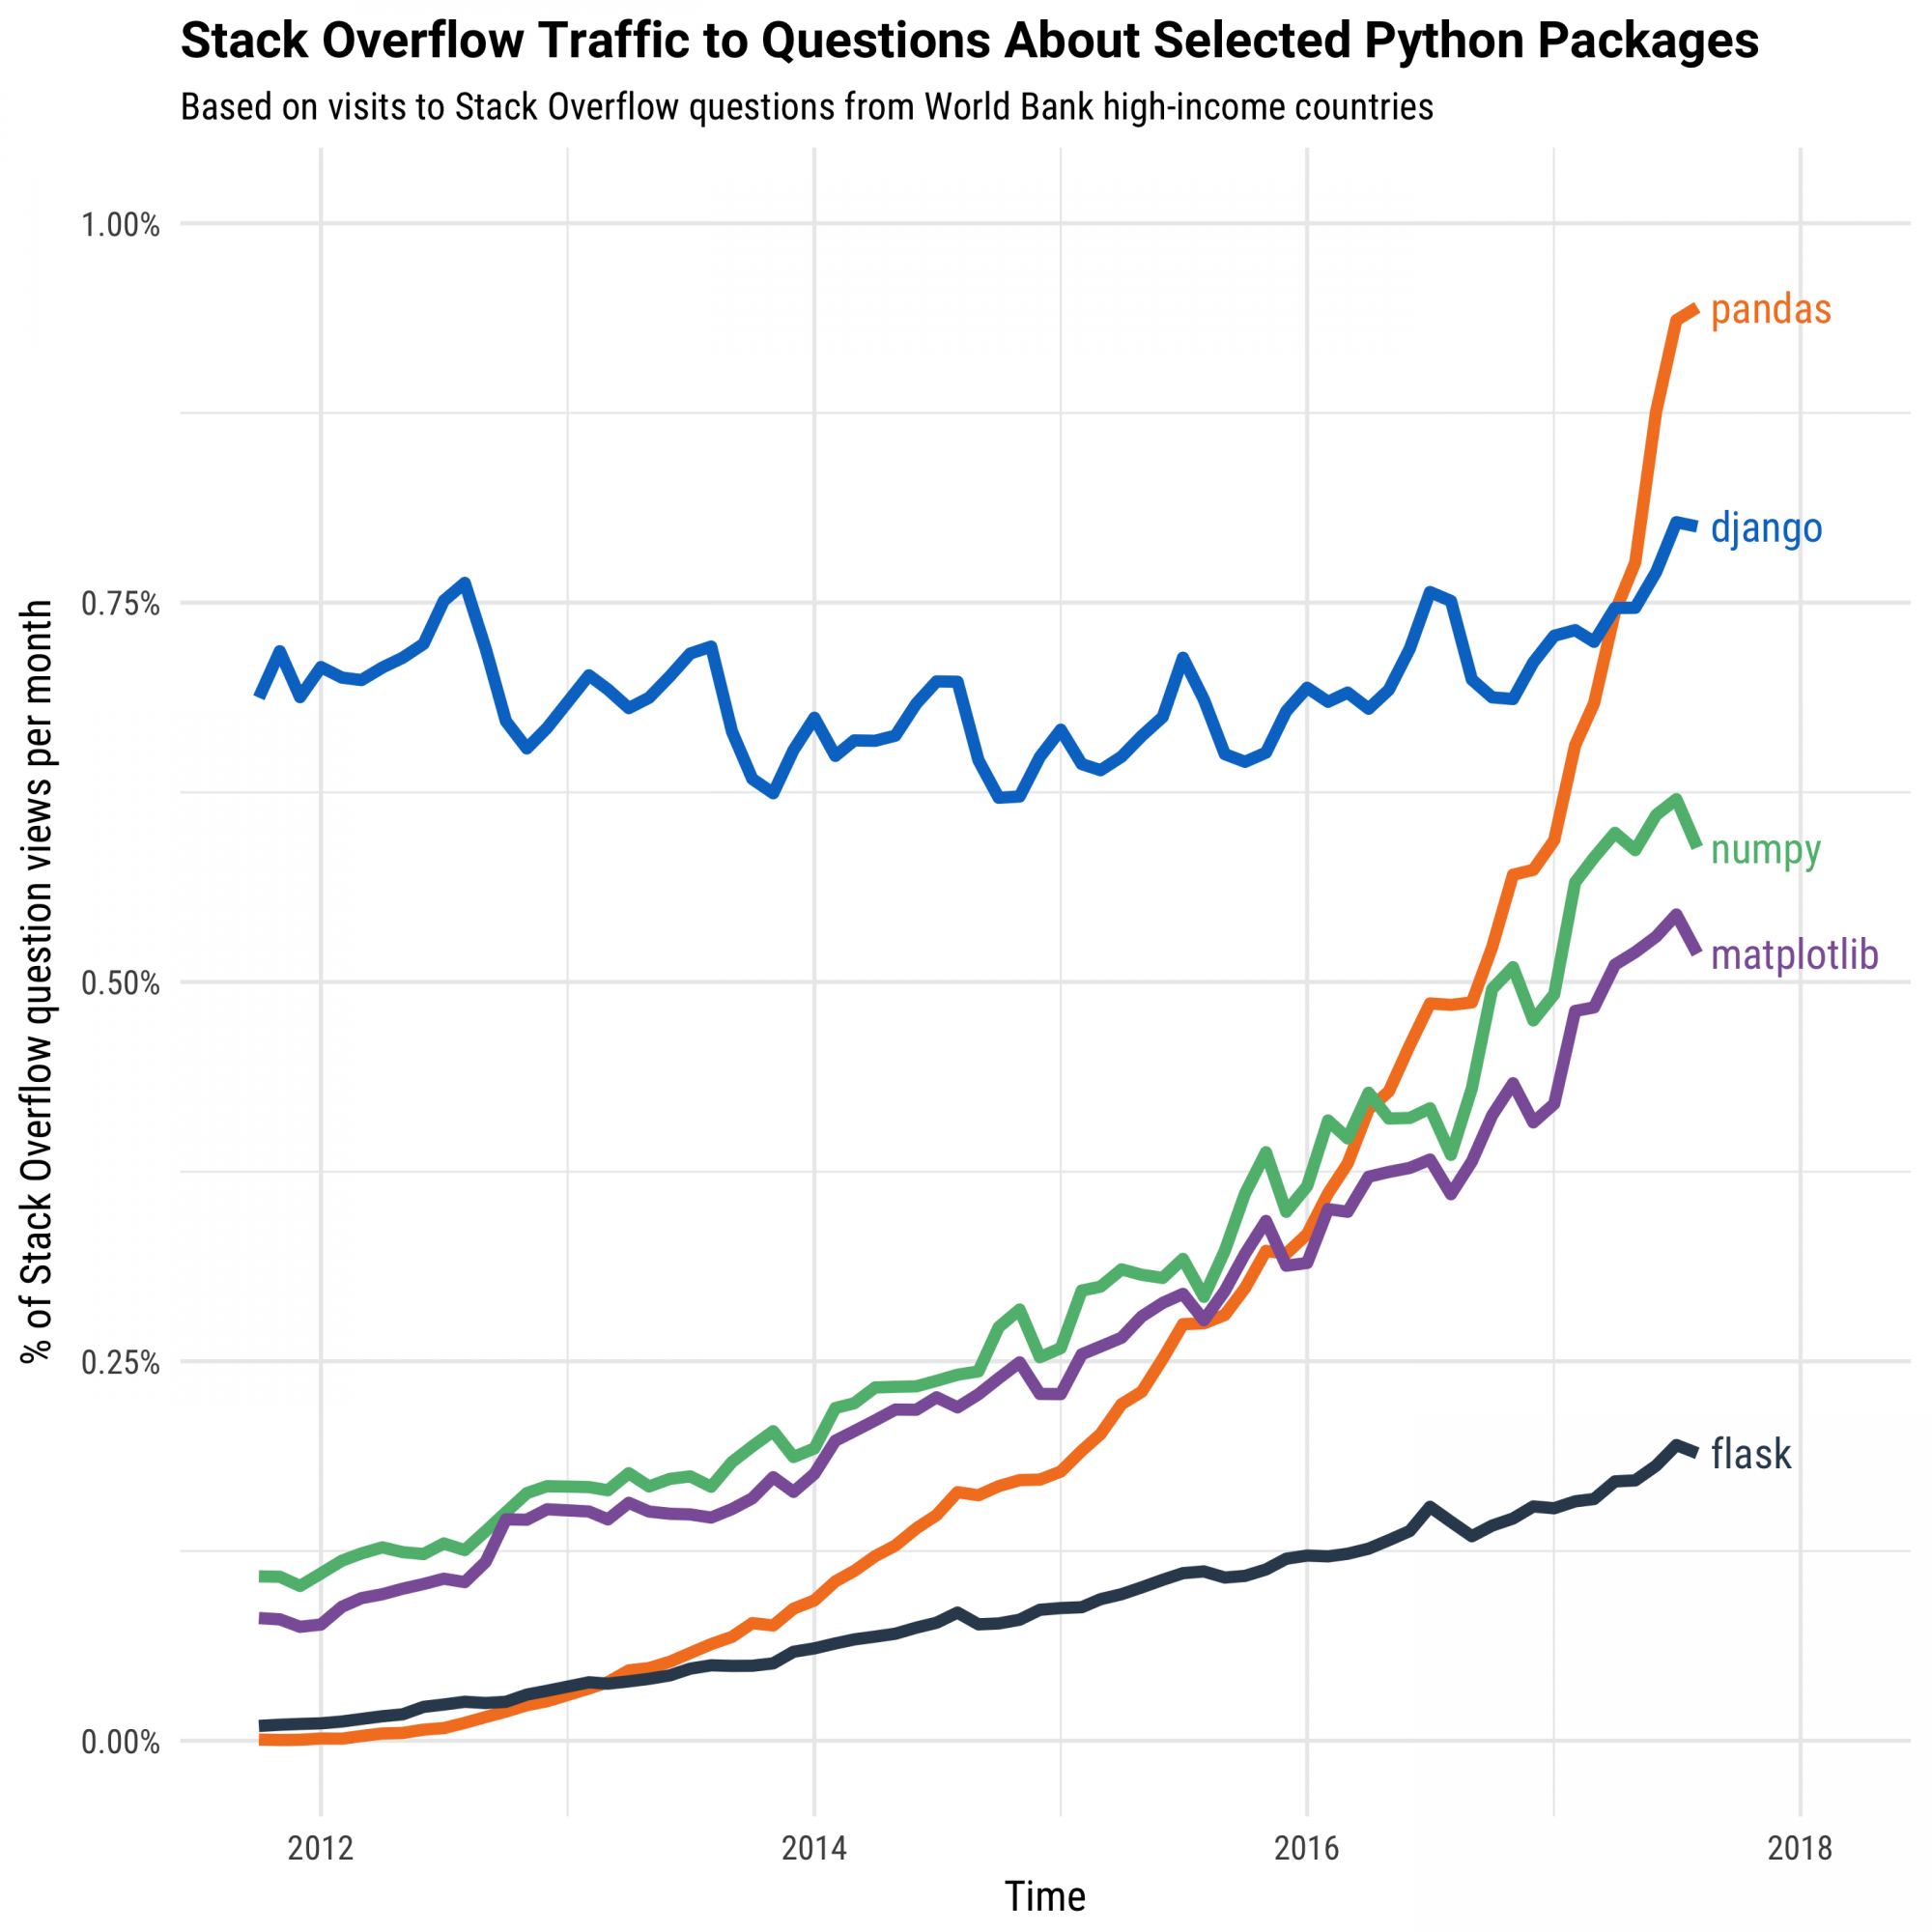

The exponential growth of pandas is due to the fact that it *just works*. It saves you time and helps you do science more efficiently and effectively.

**Pandas capabilities** (from the [Pandas website](https://pandas.pydata.org/)):

* A fast and efficient DataFrame object for data manipulation with integrated indexing;

* Tools for reading and writing data between in-memory data structures and different formats: CSV and text files, Microsoft Excel, SQL databases, and the fast HDF5 format;

* Intelligent data alignment and integrated handling of missing data: gain automatic label-based alignment in computations and easily manipulate messy data into an orderly form;

* Flexible reshaping and pivoting of data sets;

* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;

* Columns can be inserted and deleted from data structures for size mutability;

* Aggregating or transforming data with a powerful group by engine allowing split-apply-combine operations on data sets;

* High performance merging and joining of data sets;

* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;

* Time series-functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging. Even create domain-specific time offsets and join time series without losing data;

* Highly optimized for performance, with critical code paths written in Cython or C.

* Python with pandas is in use in a wide variety of academic and commercial domains, including Finance, Neuroscience, Economics, Statistics, Advertising, Web Analytics, and more.

In this notebook, we will go over the basic capabilities of Pandas. It is a very deep library, and you will need to dig into the [documentation](http://pandas.pydata.org/pandas-docs/stable/) for more advanced usage.

`Pandas` was created by [Wes McKinney](http://wesmckinney.com/). Many of the examples here are drawn from Wes McKinney’s book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do), which includes "a GitHub repo of [code samples](https://github.com/wesm/pydata-book).

# Pandas Data Structures: Series

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

A `Series` represents a one-dimensional array of data. The main difference between a `Series` and `numpy` array is that a `Series` has an index. The index contains the labels that we use to access the data.

There are many ways to create a `Series`. We will just show a few.

(Data are from the NASA [Planetary Fact Sheet](https://nssdc.gsfc.nasa.gov/planetary/factsheet/).)

In [2]:
names = ['Mercury', 'Venus', 'Earth']
values = [0.3e24, 4.87e24, 5.97e24]
masses = pd.Series(values, index=names)
masses

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
dtype: float64

Series have built in plotting methods.

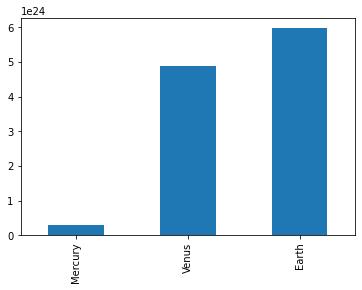

In [3]:
masses.plot(kind='bar')

Arithmetic operations and most `numpy` function can be applied to Series. An important point is that the Series keep their index during such operations.

In [4]:
np.log(masses) / masses**2

Mercury    6.006452e-46
Venus      2.396820e-48
Earth      1.600655e-48
dtype: float64

We can access the underlying index object if we need to:

In [5]:
masses.index

Index(['Mercury', 'Venus', 'Earth'], dtype='object')

## Indexing

We can get values back out using the index via the `.loc` attribute

In [6]:
masses.loc['Earth']

5.97e+24

Or by raw position using `.iloc`

In [7]:
masses.iloc[2]

5.97e+24

We can pass a list or array to loc to get multiple rows back:

In [8]:
masses.loc[['Venus', 'Earth']]

Venus    4.870000e+24
Earth    5.970000e+24
dtype: float64

And we can even use slice notation

In [9]:
masses.loc['Mercury':'Earth']

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
dtype: float64

In [10]:
masses.iloc[:2]

Mercury    3.000000e+23
Venus      4.870000e+24
dtype: float64

If we need to, we can always get the raw data back out as well

In [11]:
masses.values # a numpy array

array([3.00e+23, 4.87e+24, 5.97e+24])

In [12]:
masses.index # a pandas Index object

Index(['Mercury', 'Venus', 'Earth'], dtype='object')

<a name="DataFrame"></a>
# Pandas Data Structures: DataFrame

There is a lot more to Series, but they are limit to a single “column”. A more useful Pandas data structure is the DataFrame. A DataFrame is basically a bunch of series that share the same index. It’s a lot like a table in a spreadsheet.

Below we create a DataFrame.

In [13]:
# first we create a dictionary
data = {'mass': [0.3e24, 4.87e24, 5.97e24],       # kg
        'diameter': [4879e3, 12_104e3, 12_756e3], # m
        'rotation_period': [1407.6, np.nan, 23.9] # h
       }
df = pd.DataFrame(data, index=['Mercury', 'Venus', 'Earth'])
df

,mass,diameter,rotation_period
Mercury,3.000000e+23,4879000.0,1407.6
Venus,4.870000e+24,12104000.0,NaN
Earth,5.970000e+24,12756000.0,23.9


Pandas handles missing data very elegantly, keeping track of it through all calculations.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Mercury to Earth
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mass             3 non-null      float64
 1   diameter         3 non-null      float64
 2   rotation_period  2 non-null      float64
dtypes: float64(3)
memory usage: 96.0+ bytes


A wide range of statistical functions are available on both `Series` and `DataFrames`.

In [15]:
df.min()

mass               3.000000e+23
diameter           4.879000e+06
rotation_period    2.390000e+01
dtype: float64

In [16]:
df.mean()

mass               3.713333e+24
diameter           9.913000e+06
rotation_period    7.157500e+02
dtype: float64

In [17]:
df.std()

mass               3.006765e+24
diameter           4.371744e+06
rotation_period    9.784237e+02
dtype: float64

In [18]:
df.describe()

,mass,diameter,rotation_period
count,3.000000e+00,3.000000e+00,2.000000
mean,3.713333e+24,9.913000e+06,715.750000
std,3.006765e+24,4.371744e+06,978.423653
min,3.000000e+23,4.879000e+06,23.900000
25%,2.585000e+24,8.491500e+06,369.825000
50%,4.870000e+24,1.210400e+07,715.750000
75%,5.420000e+24,1.243000e+07,1061.675000
max,5.970000e+24,1.275600e+07,1407.600000


We can get a single column as a `Series` using python’s `getitem` syntax on the `DataFrame` object.

In [19]:
df['mass']

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
Name: mass, dtype: float64

…or using attribute syntax.

In [20]:
df.mass

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
Name: mass, dtype: float64

Indexing works very similar to series

In [21]:
df.loc['Earth']

mass               5.970000e+24
diameter           1.275600e+07
rotation_period    2.390000e+01
Name: Earth, dtype: float64

In [22]:
df.iloc[2]

mass               5.970000e+24
diameter           1.275600e+07
rotation_period    2.390000e+01
Name: Earth, dtype: float64

But we can also specify the column we want to access

In [23]:
df.loc['Earth', 'mass']

5.97e+24

In [24]:
df.iloc[:2, 0]

Mercury    3.000000e+23
Venus      4.870000e+24
Name: mass, dtype: float64

If we make a calculation using columns from the `DataFrame`, it will keep the same index:

In [25]:
volume =  4/3 * np.pi * (df.diameter/2)**3
df.mass / volume

Mercury    4933.216530
Venus      5244.977070
Earth      5493.285577
dtype: float64

Which we can easily add as another column to the `DataFrame`:

In [26]:
df['density'] = df.mass / volume
df

,mass,diameter,rotation_period,density
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530
Venus,4.870000e+24,12104000.0,NaN,5244.977070
Earth,5.970000e+24,12756000.0,23.9,5493.285577


<a name="Merging_Data"></a>
# Merging Data

Pandas supports a wide range of methods for merging different datasets. These are described extensively in the [documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html). Here we just give a few examples.

In [27]:
temperature = pd.Series([167, 464, 15, -65],
                     index=['Mercury', 'Venus', 'Earth', 'Mars'],
                     name='temperature')
temperature

Mercury    167
Venus      464
Earth       15
Mars       -65
Name: temperature, dtype: int64

In [28]:
# returns a new DataFrame
df.join(temperature)

,mass,diameter,rotation_period,density,temperature
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530,167
Venus,4.870000e+24,12104000.0,NaN,5244.977070,464
Earth,5.970000e+24,12756000.0,23.9,5493.285577,15


In [29]:
# returns a new DataFrame
df.join(temperature, how='right')

,mass,diameter,rotation_period,density,temperature
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530,167
Venus,4.870000e+24,12104000.0,NaN,5244.977070,464
Earth,5.970000e+24,12756000.0,23.9,5493.285577,15
Mars,NaN,NaN,NaN,NaN,-65


In [30]:
# returns a new DataFrame
everyone = df.reindex(['Mercury', 'Venus', 'Earth', 'Mars'])
everyone

,mass,diameter,rotation_period,density
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530
Venus,4.870000e+24,12104000.0,NaN,5244.977070
Earth,5.970000e+24,12756000.0,23.9,5493.285577
Mars,NaN,NaN,NaN,NaN


We can also index using a boolean series. This is very useful:

In [31]:
adults = df[df.mass > 4e24]
adults

,mass,diameter,rotation_period,density
Venus,4.870000e+24,12104000.0,NaN,5244.977070
Earth,5.970000e+24,12756000.0,23.9,5493.285577


In [32]:
df['is_big'] = df.mass > 4e24
df

,mass,diameter,rotation_period,density,is_big
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530,False
Venus,4.870000e+24,12104000.0,NaN,5244.977070,True
Earth,5.970000e+24,12756000.0,23.9,5493.285577,True


# Modifying Values

We often want to modify values in a dataframe based on some rule. To modify values, we need to use `.loc` or `.iloc`

In [33]:
df.loc['Earth', 'mass'] = 5.98+24
df.loc['Venus', 'diameter'] += 1
df

,mass,diameter,rotation_period,density,is_big
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530,False
Venus,4.870000e+24,12104001.0,NaN,5244.977070,True
Earth,2.998000e+01,12756000.0,23.9,5493.285577,True


# Plotting

DataFrames have all kinds of [useful plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html) built in.

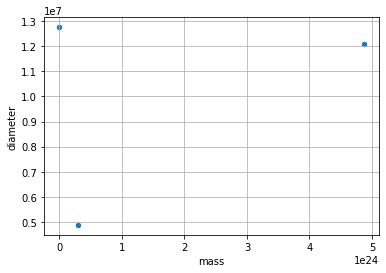

In [34]:
df.plot(kind='scatter', x='mass', y='diameter', grid=True)

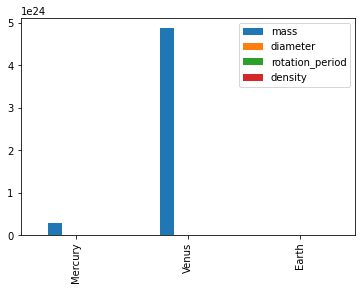

In [35]:
df.plot(kind='bar')

# Time `Index`es

Indexes are very powerful. They are a big part of why `Pandas` is so useful. There are different indexes for different types of data. Time indexes are especially great!

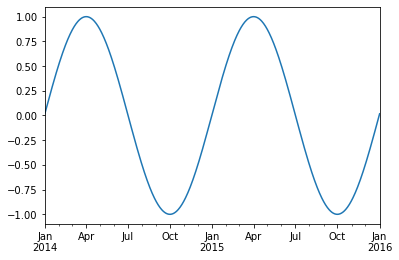

In [36]:
two_years = pd.date_range(start='2014-01-01', end='2016-01-01', freq='D')
timeseries = pd.Series(np.sin(2 *np.pi *two_years.dayofyear / 365),
                       index=two_years)
timeseries.plot()

We can use python’s slicing notation inside `.loc` to select a date range.

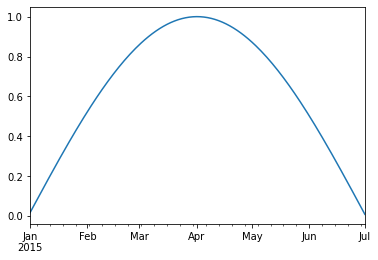

In [37]:
timeseries.loc['2015-01-01':'2015-07-01'].plot()

The `TimeIndex` object has lots of useful attributes

In [38]:
timeseries.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12,  1],
           dtype='int64', length=731)

In [39]:
timeseries.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            23, 24, 25, 26, 27, 28, 29, 30, 31,  1],
           dtype='int64', length=731)

<a name="Weather"></a>
# Reading Data Files: Weather Station Data

In this example, we will use NOAA weather station data from https://www.ncdc.noaa.gov/data-access/land-based-station-data.

The details of files we are going to read are described in this README file.

In [40]:
import pooch
POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    base_url="doi:10.5281/zenodo.5564850/",
    registry={
        "data.txt": "md5:5129dcfd19300eb8d4d8d1673fcfbcb4",
    },
)
datafile = POOCH.fetch("data.txt")
datafile

'/root/.cache/noaa-data/data.txt'

In [41]:
! head '/root/.cache/noaa-data/data.txt' # Replace this value with the download path indicated above

WBANNO LST_DATE CRX_VN LONGITUDE LATITUDE T_DAILY_MAX T_DAILY_MIN T_DAILY_MEAN T_DAILY_AVG P_DAILY_CALC SOLARAD_DAILY SUR_TEMP_DAILY_TYPE SUR_TEMP_DAILY_MAX SUR_TEMP_DAILY_MIN SUR_TEMP_DAILY_AVG RH_DAILY_MAX RH_DAILY_MIN RH_DAILY_AVG SOIL_MOISTURE_5_DAILY SOIL_MOISTURE_10_DAILY SOIL_MOISTURE_20_DAILY SOIL_MOISTURE_50_DAILY SOIL_MOISTURE_100_DAILY SOIL_TEMP_5_DAILY SOIL_TEMP_10_DAILY SOIL_TEMP_20_DAILY SOIL_TEMP_50_DAILY SOIL_TEMP_100_DAILY 
64756 20170101  2.422  -73.74   41.79     6.6    -5.4     0.6     2.2     0.0     8.68 C     7.9    -6.6    -0.5    84.8    30.7    53.7 -99.000 -99.000   0.207   0.152   0.175    -0.1     0.0     0.6     1.5     3.4
64756 20170102  2.422  -73.74   41.79     4.0    -6.8    -1.4    -1.2     0.0     2.08 C     4.1    -7.1    -1.6    91.1    49.1    77.4 -99.000 -99.000   0.205   0.151   0.173    -0.2     0.0     0.6     1.5     3.3
64756 20170103  2.422  -73.74   41.79     4.9     0.7     2.8     2.7    13.1     0.68 C     3.9     0.1     1.6    96.5 

We now have a text file on our hard drive called `data.txt`.

To read it into `pandas`, we will use the `read_csv` function. This function is incredibly complex and powerful. You can use it to extract data from almost any text file. However, you need to understand how to use its various options.

With no options, this is what we get.

In [42]:
df = pd.read_csv(datafile)
df.head()

,WBANNO LST_DATE CRX_VN LONGITUDE LATITUDE T_DAILY_MAX T_DAILY_MIN T_DAILY_MEAN T_DAILY_AVG P_DAILY_CALC SOLARAD_DAILY SUR_TEMP_DAILY_TYPE SUR_TEMP_DAILY_MAX SUR_TEMP_DAILY_MIN SUR_TEMP_DAILY_AVG RH_DAILY_MAX RH_DAILY_MIN RH_DAILY_AVG SOIL_MOISTURE_5_DAILY SOIL_MOISTURE_10_DAILY SOIL_MOISTURE_20_DAILY SOIL_MOISTURE_50_DAILY SOIL_MOISTURE_100_DAILY SOIL_TEMP_5_DAILY SOIL_TEMP_10_DAILY SOIL_TEMP_20_DAILY SOIL_TEMP_50_DAILY SOIL_TEMP_100_DAILY
0,64756 20170101 2.422 -73.74 41.79 6.6 ...
1,64756 20170102 2.422 -73.74 41.79 4.0 ...
2,64756 20170103 2.422 -73.74 41.79 4.9 ...
3,64756 20170104 2.422 -73.74 41.79 8.7 ...
4,64756 20170105 2.422 -73.74 41.79 -0.5 ...


Pandas failed to identify the different columns. This is because it was expecting standard [`CSV` (comma-separated values)](https://en.wikipedia.org/wiki/Comma-separated_values) file. In our file, instead, the values are separated by whitespace. And not a single whilespace–the amount of whitespace between values varies. We can tell pandas this using the `sep` keyword.

In [43]:
df = pd.read_csv(datafile, sep='\s+')
df.head()

,WBANNO,LST_DATE,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
0,64756,20170101,2.422,-73.74,41.79,6.6,-5.4,0.6,2.2,0.0,...,-99.0,-99.0,0.207,0.152,0.175,-0.1,0.0,0.6,1.5,3.4
1,64756,20170102,2.422,-73.74,41.79,4.0,-6.8,-1.4,-1.2,0.0,...,-99.0,-99.0,0.205,0.151,0.173,-0.2,0.0,0.6,1.5,3.3
2,64756,20170103,2.422,-73.74,41.79,4.9,0.7,2.8,2.7,13.1,...,-99.0,-99.0,0.205,0.150,0.173,-0.1,0.0,0.5,1.5,3.3
3,64756,20170104,2.422,-73.74,41.79,8.7,-1.6,3.6,3.5,1.3,...,-99.0,-99.0,0.215,0.153,0.174,-0.1,0.0,0.5,1.5,3.2
4,64756,20170105,2.422,-73.74,41.79,-0.5,-4.6,-2.5,-2.8,0.0,...,-99.0,-99.0,0.215,0.154,0.177,-0.1,0.0,0.5,1.4,3.1


Great! It worked.

If we look closely, we will see there are lots of -99 and -9999 values in the file. The README file tells us that these are values used to represent missing data. Let’s tell this to pandas.

In [44]:
df = pd.read_csv(datafile, sep='\s+', na_values=[-9999.0, -99.0])
df.head()

,WBANNO,LST_DATE,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
0,64756,20170101,2.422,-73.74,41.79,6.6,-5.4,0.6,2.2,0.0,...,NaN,NaN,0.207,0.152,0.175,-0.1,0.0,0.6,1.5,3.4
1,64756,20170102,2.422,-73.74,41.79,4.0,-6.8,-1.4,-1.2,0.0,...,NaN,NaN,0.205,0.151,0.173,-0.2,0.0,0.6,1.5,3.3
2,64756,20170103,2.422,-73.74,41.79,4.9,0.7,2.8,2.7,13.1,...,NaN,NaN,0.205,0.150,0.173,-0.1,0.0,0.5,1.5,3.3
3,64756,20170104,2.422,-73.74,41.79,8.7,-1.6,3.6,3.5,1.3,...,NaN,NaN,0.215,0.153,0.174,-0.1,0.0,0.5,1.5,3.2
4,64756,20170105,2.422,-73.74,41.79,-0.5,-4.6,-2.5,-2.8,0.0,...,NaN,NaN,0.215,0.154,0.177,-0.1,0.0,0.5,1.4,3.1


Wonderful. The missing data is now represented by `NaN`.

What data types did pandas infer?

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   WBANNO                   365 non-null    int64  
 1   LST_DATE                 365 non-null    int64  
 2   CRX_VN                   365 non-null    float64
 3   LONGITUDE                365 non-null    float64
 4   LATITUDE                 365 non-null    float64
 5   T_DAILY_MAX              364 non-null    float64
 6   T_DAILY_MIN              364 non-null    float64
 7   T_DAILY_MEAN             364 non-null    float64
 8   T_DAILY_AVG              364 non-null    float64
 9   P_DAILY_CALC             364 non-null    float64
 10  SOLARAD_DAILY            364 non-null    float64
 11  SUR_TEMP_DAILY_TYPE      365 non-null    object 
 12  SUR_TEMP_DAILY_MAX       364 non-null    float64
 13  SUR_TEMP_DAILY_MIN       364 non-null    float64
 14  SUR_TEMP_DAILY_AVG       3

One problem here is that pandas did not recognize the `LDT_DATE` column as a date. Let’s help it.

In [46]:
df = pd.read_csv(datafile, sep='\s+',
                 na_values=[-9999.0, -99.0],
                 parse_dates=[1])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   WBANNO                   365 non-null    int64         
 1   LST_DATE                 365 non-null    datetime64[ns]
 2   CRX_VN                   365 non-null    float64       
 3   LONGITUDE                365 non-null    float64       
 4   LATITUDE                 365 non-null    float64       
 5   T_DAILY_MAX              364 non-null    float64       
 6   T_DAILY_MIN              364 non-null    float64       
 7   T_DAILY_MEAN             364 non-null    float64       
 8   T_DAILY_AVG              364 non-null    float64       
 9   P_DAILY_CALC             364 non-null    float64       
 10  SOLARAD_DAILY            364 non-null    float64       
 11  SUR_TEMP_DAILY_TYPE      365 non-null    object        
 12  SUR_TEMP_DAILY_MAX       364 non-nul

It worked! Finally, let’s tell pandas to use the date column as the index.

In [47]:
df = df.set_index('LST_DATE')
df.head()

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
LST_DATE,,,,,,,,,,,,,,,,,,,,,
2017-01-01,64756,2.422,-73.74,41.79,6.6,-5.4,0.6,2.2,0.0,8.68,...,NaN,NaN,0.207,0.152,0.175,-0.1,0.0,0.6,1.5,3.4
2017-01-02,64756,2.422,-73.74,41.79,4.0,-6.8,-1.4,-1.2,0.0,2.08,...,NaN,NaN,0.205,0.151,0.173,-0.2,0.0,0.6,1.5,3.3
2017-01-03,64756,2.422,-73.74,41.79,4.9,0.7,2.8,2.7,13.1,0.68,...,NaN,NaN,0.205,0.150,0.173,-0.1,0.0,0.5,1.5,3.3
2017-01-04,64756,2.422,-73.74,41.79,8.7,-1.6,3.6,3.5,1.3,2.85,...,NaN,NaN,0.215,0.153,0.174,-0.1,0.0,0.5,1.5,3.2
2017-01-05,64756,2.422,-73.74,41.79,-0.5,-4.6,-2.5,-2.8,0.0,4.90,...,NaN,NaN,0.215,0.154,0.177,-0.1,0.0,0.5,1.4,3.1


We can now access values by time:

In [48]:
df.loc['2017-08-07']

WBANNO                     64756
CRX_VN                     2.422
LONGITUDE                 -73.74
LATITUDE                   41.79
T_DAILY_MAX                 19.3
T_DAILY_MIN                 12.3
T_DAILY_MEAN                15.8
T_DAILY_AVG                 16.3
P_DAILY_CALC                 4.9
SOLARAD_DAILY               3.93
SUR_TEMP_DAILY_TYPE            C
SUR_TEMP_DAILY_MAX          22.3
SUR_TEMP_DAILY_MIN          11.9
SUR_TEMP_DAILY_AVG          17.7
RH_DAILY_MAX                94.7
RH_DAILY_MIN                76.4
RH_DAILY_AVG                89.5
SOIL_MOISTURE_5_DAILY      0.148
SOIL_MOISTURE_10_DAILY     0.113
SOIL_MOISTURE_20_DAILY     0.094
SOIL_MOISTURE_50_DAILY     0.114
SOIL_MOISTURE_100_DAILY    0.151
SOIL_TEMP_5_DAILY           21.4
SOIL_TEMP_10_DAILY          21.7
SOIL_TEMP_20_DAILY          22.1
SOIL_TEMP_50_DAILY          22.2
SOIL_TEMP_100_DAILY         21.5
Name: 2017-08-07 00:00:00, dtype: object

Or use slicing to get a range:

In [49]:
df.loc['2017-07-01':'2017-07-31']

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
LST_DATE,,,,,,,,,,,,,,,,,,,,,
2017-07-01,64756,2.422,-73.74,41.79,28.0,19.7,23.9,23.8,0.2,19.28,...,0.157,0.136,0.144,0.129,0.163,25.7,25.4,23.7,21.9,19.9
2017-07-02,64756,2.422,-73.74,41.79,29.8,18.4,24.1,23.7,4.0,27.67,...,0.146,0.135,0.143,0.129,0.162,26.8,26.4,24.5,22.3,20.1
2017-07-03,64756,2.422,-73.74,41.79,28.3,15.0,21.7,21.4,0.0,27.08,...,0.141,0.132,0.139,0.128,0.162,26.4,26.3,24.8,22.8,20.3
2017-07-04,64756,2.422,-73.74,41.79,26.8,12.6,19.7,20.0,0.0,29.45,...,0.131,0.126,0.136,0.126,0.161,25.9,25.8,24.6,22.9,20.6
2017-07-05,64756,2.422,-73.74,41.79,28.0,11.9,20.0,20.7,0.0,26.90,...,0.116,0.114,0.131,0.125,0.161,25.3,25.3,24.2,22.8,20.7
2017-07-06,64756,2.422,-73.74,41.79,25.7,14.3,20.0,20.3,0.0,19.03,...,0.105,0.104,0.126,0.124,0.160,24.7,24.7,23.9,22.7,20.9
2017-07-07,64756,2.422,-73.74,41.79,25.8,16.8,21.3,20.0,11.5,13.88,...,0.114,0.100,0.123,0.123,0.160,24.2,24.2,23.4,22.4,20.8
2017-07-08,64756,2.422,-73.74,41.79,29.0,15.3,22.1,21.5,0.0,21.92,...,0.130,0.106,0.122,0.123,0.159,25.5,25.3,23.9,22.4,20.8
2017-07-09,64756,2.422,-73.74,41.79,26.3,10.9,18.6,19.4,0.0,29.72,...,0.119,0.103,0.119,0.121,0.158,24.8,24.8,23.8,22.5,20.8


# Quick statistics

In [50]:
df.describe()

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
count,365.0,365.000000,3.650000e+02,3.650000e+02,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,317.000000,317.000000,336.000000,364.000000,359.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,64756.0,2.470767,-7.374000e+01,4.179000e+01,15.720055,4.037912,9.876374,9.990110,2.797802,13.068187,...,0.189498,0.183991,0.165470,0.140192,0.160630,12.312637,12.320604,12.060165,11.978022,11.915659
std,0.0,0.085997,5.265234e-13,3.842198e-13,10.502087,9.460676,9.727451,9.619168,7.238628,7.953074,...,0.052031,0.054113,0.043989,0.020495,0.016011,9.390034,9.338176,8.767752,8.078346,7.187317
min,64756.0,2.422000,-7.374000e+01,4.179000e+01,-12.300000,-21.800000,-17.000000,-16.700000,0.000000,0.100000,...,0.075000,0.078000,0.087000,0.101000,0.117000,-0.700000,-0.400000,0.200000,0.900000,1.900000
25%,64756.0,2.422000,-7.374000e+01,4.179000e+01,6.900000,-2.775000,2.100000,2.275000,0.000000,6.225000,...,0.152000,0.139000,0.118750,0.118000,0.154000,2.225000,2.000000,2.475000,3.300000,4.100000
50%,64756.0,2.422000,-7.374000e+01,4.179000e+01,17.450000,4.350000,10.850000,11.050000,0.000000,12.865000,...,0.192000,0.198000,0.183000,0.147500,0.165000,13.300000,13.350000,13.100000,12.850000,11.600000
75%,64756.0,2.422000,-7.374000e+01,4.179000e+01,24.850000,11.900000,18.150000,18.450000,1.400000,19.740000,...,0.234000,0.227000,0.203000,0.157000,0.173000,21.025000,21.125000,20.400000,19.800000,19.325000
max,64756.0,2.622000,-7.374000e+01,4.179000e+01,33.400000,20.700000,25.700000,26.700000,65.700000,29.910000,...,0.296000,0.321000,0.235000,0.182000,0.192000,27.600000,27.400000,25.600000,24.100000,22.100000


<a name="Plotting_Values"></a>
# Plotting Values

We can now quickly make plots of the data

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


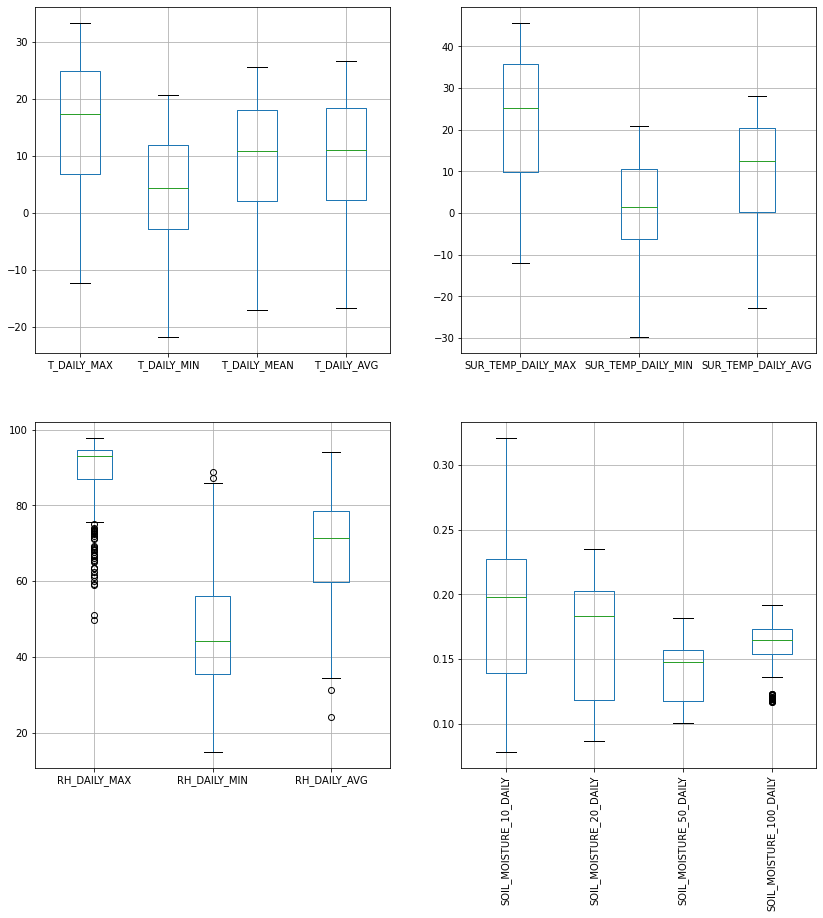

In [51]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(14,14))

df.iloc[:, 4:8].boxplot(ax=ax[0,0])
df.iloc[:, 10:14].boxplot(ax=ax[0,1])
df.iloc[:, 14:17].boxplot(ax=ax[1,0])
df.iloc[:, 18:22].boxplot(ax=ax[1,1])


ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=90);

Pandas is very “time aware”:

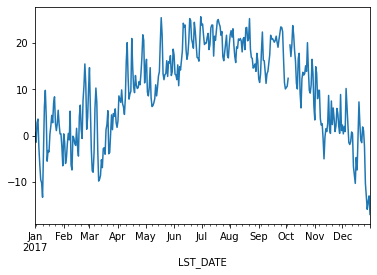

In [52]:
df.T_DAILY_MEAN.plot()

**Note:** we could also manually create an axis and plot into it.

Text(0.5, 1.0, 'Pandas Made This!')

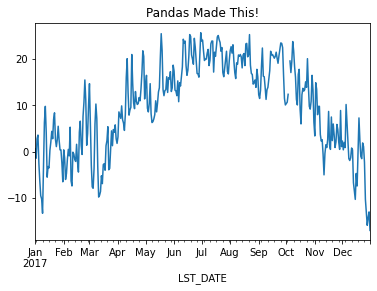

In [53]:
fig, ax = plt.subplots()
df.T_DAILY_MEAN.plot(ax=ax)
ax.set_title('Pandas Made This!')

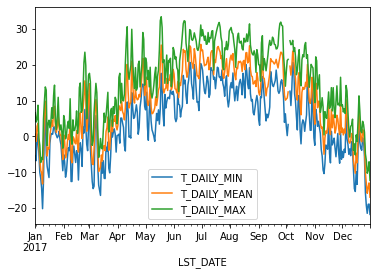

In [54]:
df[['T_DAILY_MIN', 'T_DAILY_MEAN', 'T_DAILY_MAX']].plot()

# Resampling

Since `pandas` understands time, we can use it to do resampling.

In [55]:
# monthly reampler object
rs_obj = df.resample('MS')
rs_obj

In [56]:
rs_obj.mean()

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
LST_DATE,,,,,,,,,,,,,,,,,,,,,
2017-01-01,64756.0,2.422000,-73.74,41.79,3.945161,-3.993548,-0.025806,0.038710,3.090323,4.690000,...,0.236900,0.248300,0.204550,0.152806,0.175194,0.209677,0.267742,0.696774,1.438710,2.877419
2017-02-01,64756.0,2.422000,-73.74,41.79,7.246429,-4.360714,1.442857,1.839286,2.414286,10.364286,...,0.226333,0.243000,0.207545,0.152857,0.175786,1.125000,1.100000,1.192857,1.492857,2.367857
2017-03-01,64756.0,2.422000,-73.74,41.79,5.164516,-5.335484,-0.090323,0.167742,3.970968,13.113548,...,0.218033,0.229267,0.196258,0.153484,0.174548,2.122581,2.161290,2.345161,2.700000,3.387097
2017-04-01,64756.0,2.422000,-73.74,41.79,17.813333,5.170000,11.493333,11.540000,2.300000,14.645000,...,0.199733,0.210300,0.190667,0.151000,0.172400,11.066667,10.666667,9.636667,8.426667,6.903333
2017-05-01,64756.0,2.422000,-73.74,41.79,19.151613,7.338710,13.229032,13.638710,4.141935,16.519677,...,0.206613,0.210935,0.185613,0.147710,0.170000,16.454839,16.290323,15.361290,14.270968,12.696774
2017-06-01,64756.0,2.422000,-73.74,41.79,25.423333,12.176667,18.796667,18.986667,3.743333,21.655000,...,0.185167,0.184300,0.173167,0.142533,0.167000,22.350000,22.166667,20.880000,19.370000,17.333333
2017-07-01,64756.0,2.422000,-73.74,41.79,26.912903,15.183871,21.048387,20.993548,2.732258,20.566129,...,0.131226,0.115774,0.116613,0.121032,0.156677,24.993548,24.980645,23.925806,22.745161,21.164516
2017-08-01,64756.0,2.422000,-73.74,41.79,25.741935,12.954839,19.351613,19.477419,2.758065,18.360000,...,0.143871,0.122258,0.105452,0.115290,0.151034,23.374194,23.519355,22.848387,22.193548,21.377419
2017-09-01,64756.0,2.422000,-73.74,41.79,24.186667,11.300000,17.746667,17.463333,1.893333,15.154667,...,0.145167,0.139633,0.117267,0.112167,0.141926,20.256667,20.386667,19.966667,19.766667,19.530000


We can chain all of that together

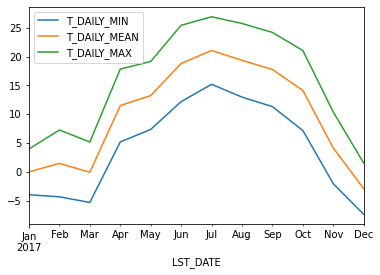

In [57]:
df_mm = df.resample('MS').mean()
df_mm[['T_DAILY_MIN', 'T_DAILY_MEAN', 'T_DAILY_MAX']].plot()

**And this concludes this notebook's tutorial 😀**

If you would like to learn more about `pandas`, check out the [`groupby` tutorial](https://earth-env-data-science.github.io/lectures/pandas/pandas_groupby.html) from the [Earth and Environmental Data Science book](https://earth-env-data-science.github.io/intro.html), the [Github repository](https://github.com/wesm/pydata-book) of the [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do), or the [`pandas` community tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html).

# Exercise 4: Analyzing Earthquake Data with `Pandas`

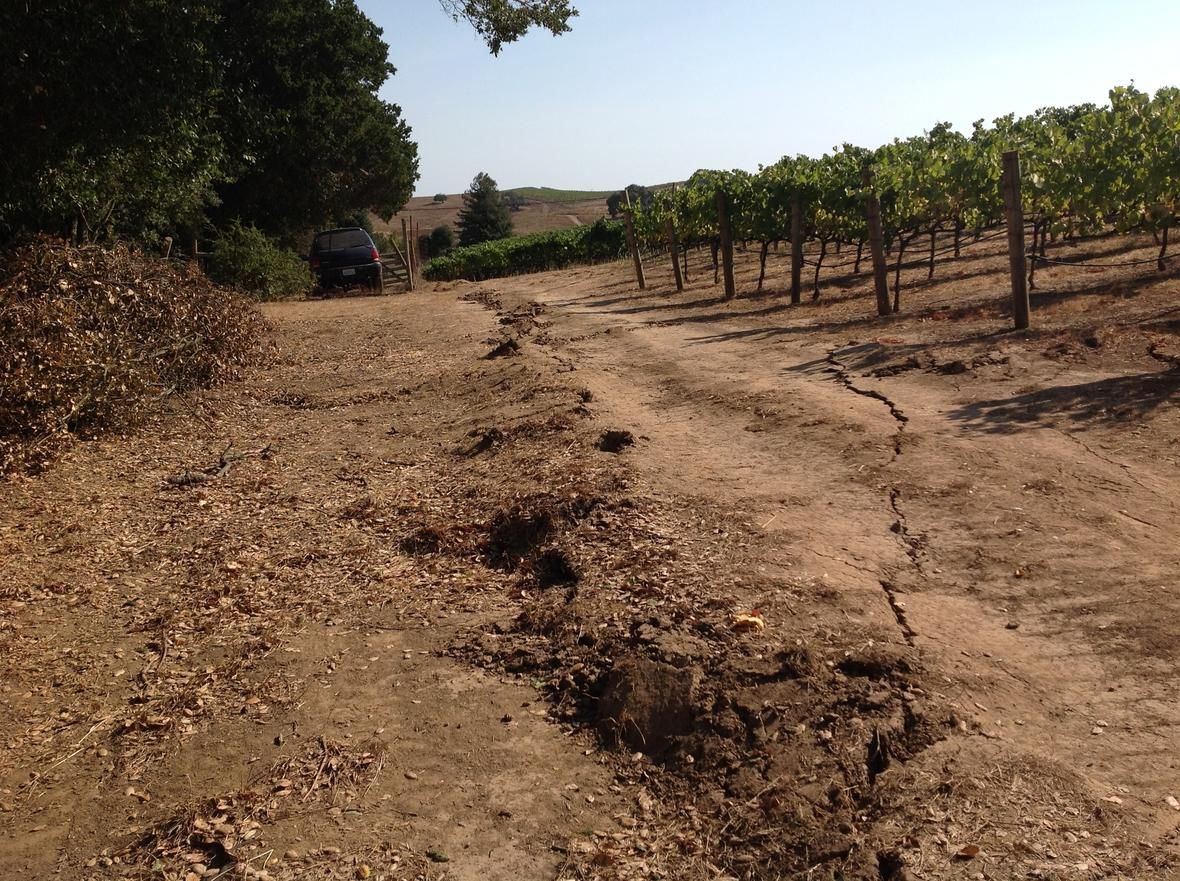

**2014 South Napa CA M6 Earthquake - August 24**

Continuous "mole-track" running parallel to the strike of the fault indicates some E-W compression in addition to [right-lateral faulting](https://www.usgs.gov/faqs/what-fault-and-what-are-different-types). Photo taken near Buhman Rd.

Source: *USGS*

In this assignment, we will review `pandas` fundamentals, such as how to

* Open csv files

* Manipulate dataframe indexes

* Parse date columns

* Examine basic dataframe statistics

* Manipulate text columns and extract values

* Plot dataframe contents using 
<ul type="circle">
<li>Bar charts</li>
<li>Histograms</li>
<li>Scatter plots</li>
</ul>

Data for this assignment in .csv format downloaded from the USGS Earthquakes Database is available at:

https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/Efg089STo25Gq6N_BBn_qGoBIsAOd2yUNBgeTfPR2wxw4g?download=1

You don’t need to download this file. You can open it directly with Pandas, with a little help from Pooch (don't worry about reading into the [Pooch documentation](https://www.fatiando.org/pooch/latest/), unless you really want to! 😃).

We'll load the datafile into memory and store the path to the file in the variable `datafile`

In [58]:
# Pooch Code
import pooch
datafile = pooch.retrieve('https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/Efg089STo25Gq6N_BBn_qGoBIsAOd2yUNBgeTfPR2wxw4g?download=1', 
                          known_hash='84d455fb96dc8f782fba4b5fbe56cb8970cab678f07c766fcba1b1c4674de1b1')

**Q1) First, import `Numpy`, `Pandas` and `Matplotlib` and (optional) set the display options.**

Hint: Display options are documented [at this link](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html)

In [60]:
# Import all libraries here 
import numpy as np
import pandas as pd
import matplotlib as plt

**Q2) Use Pandas’ `read_csv` function directly on the datafile to open it as a `DataFrame`**

Hint: Check out the [DataFrame section](#DataFrame)

In [61]:
# Open the URL as a Pandas' DataFrame
df = pd.read_csv(datafile)

In [62]:
# Display the first few rows
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [63]:
# Display the DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       120108 non-null  object 
 1   latitude   120108 non-null  float64
 2   longitude  120108 non-null  float64
 3   depth      120107 non-null  float64
 4   mag        120065 non-null  float64
 5   magType    120065 non-null  object 
 6   nst        59688 non-null   float64
 7   gap        94935 non-null   float64
 8   dmin       85682 non-null   float64
 9   rms        119716 non-null  float64
 10  net        120108 non-null  object 
 11  id         120108 non-null  object 
 12  updated    120108 non-null  object 
 13  place      120108 non-null  object 
 14  type       120108 non-null  object 
dtypes: float64(8), object(7)
memory usage: 13.7+ MB


The dates were not automatically parsed into `datetime` types!
What can we do?

**Q3) Re-read the data in such a way that all date columns are identified as dates and the earthquake ID is used as the index**

Hint: Check out the [Reading Data Files example](#Weather)

In [69]:
# Re-read the URL
df = pd.read_csv(datafile, 
                 parse_dates=[0])
df = df.set_index('id')

In [70]:
# Use the `head` function to check that it worked
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [71]:
# Use the `info` function to check that it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120108 entries, ak11155107 to ak11453389
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   time       120108 non-null  datetime64[ns]
 1   latitude   120108 non-null  float64       
 2   longitude  120108 non-null  float64       
 3   depth      120107 non-null  float64       
 4   mag        120065 non-null  float64       
 5   magType    120065 non-null  object        
 6   nst        59688 non-null   float64       
 7   gap        94935 non-null   float64       
 8   dmin       85682 non-null   float64       
 9   rms        119716 non-null  float64       
 10  net        120108 non-null  object        
 11  updated    120108 non-null  object        
 12  place      120108 non-null  object        
 13  type       120108 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 13.7+ MB


**Q4) Use `describe` to get the basic statistics of all the columns**

Hint: The documentation of `describe` is [at this link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

In [72]:
# Use the `describe` function
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
std,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046
min,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000


In [75]:
# Note the highest and lowest magnitude of earthquakes in the database
print(df['mag'].min())
print(df['mag'].max())

-0.97
8.2


**Q5) Use `nlargest` to get the top 20 earthquakes by magnitude**

Hint: The documentation of `nlargest` is [at this link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html)

In [82]:
import pandas
# Use `nlargest`
df.nlargest(20, 'mag')

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
usc000nzvd,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
usc000rki5,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
usc000p27i,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
usc000phx5,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
usb000pr89,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
usc000piqj,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.885,1.00,us,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
usb000slwn,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.078,0.70,us,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
usb000pq41,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.250,1.20,us,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
usc000pft9,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.729,0.88,us,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake


In [83]:
# Examine the structure of the `place` column.
df['place']

id
ak11155107    26km S of Redoubt Volcano, Alaska
nn00436847              32km S of Alamo, Nevada
ak11151142     12km NNW of North Nenana, Alaska
ak11151135           22km S of Cantwell, Alaska
ci37171541         10km WNW of Progreso, Mexico
                            ...                
ak11453391            29km SW of Valdez, Alaska
ak11453395     102km SSE of Old Iliamna, Alaska
nc72358451          9km WNW of Cobb, California
ak11453390             57km NW of Ester, Alaska
ak11453389          78km WSW of Cordova, Alaska
Name: place, Length: 120108, dtype: object

The state / country information seems to be in there. How would you get it out?

**Q6) Extract the state or country using `Pandas` text data functions, and add it as a new column to the `DataFrame`**

Hint 1: The documentation for Pandas' text data functions is [here](https://pandas.pydata.org/pandas-docs/stable/text.html)

Hint 2: The [DataFrame section](#DataFrame) has helpful information

In [87]:
# Extract the state or country
countries = df['place'].str.split(', ').str[-1]

In [91]:
# Add it as a new column to the `DataFrame` called `country`
countries.head()
df['country'] = countries
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,Nevada
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,Alaska
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,Alaska
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,Mexico


**Q7) Display each unique value from the new `country` column**

Hint: You may use the `unique` function documented [at this link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html)

In [92]:
# Display unique values
df['country'].unique()

array(['Alaska', 'Nevada', 'Mexico', 'California', 'Papua New Guinea',
       'New Zealand', 'Missouri', 'South of the Fiji Islands', 'Montana',
       'British Virgin Islands', 'Washington', 'Oregon', 'Canada', 'Fiji',
       'Wyoming', 'Antarctica', 'Chile', 'Utah', 'Indonesia',
       'Solomon Islands', 'Micronesia', 'Oklahoma', 'Hawaii', 'Russia',
       'Arizona', 'Philippines', 'Bolivia', 'Greece', 'Japan',
       'Puerto Rico', 'Iran', 'Tonga', 'Wallis and Futuna', 'Colorado',
       'Guam', 'CA', 'Carlsberg Ridge', 'Idaho', 'Pakistan',
       'Off the west coast of northern Sumatra', 'Burma', 'China', 'Peru',
       'Off the east coast of the North Island of New Zealand',
       'Costa Rica', 'Reykjanes Ridge', 'East Timor',
       'Central East Pacific Rise', 'Mid-Indian Ridge', 'Japan region',
       'Northern Mariana Islands', 'El Salvador', 'Samoa',
       'Northern Mid-Atlantic Ridge', 'Taiwan', 'Arkansas',
       'South Sandwich Islands', 'Colombia', 'Dominican Republic',

**Q8) Create a filtered dataset that only has earthquakes of magnitude 4 or larger**

Hint: Check out the ["Merging Data" Section](#Merging_Data)

In [94]:
# Filter the dataset based on the earthquakes' magnitudes
big_eq = df[df.mag >= 4]
big_eq

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
usc000mqlp,2014-01-31 23:08:03.660,-4.9758,153.9466,110.18,4.2,mb,NaN,98.0,1.940,0.61,us,2014-04-08T01:43:19.000Z,"115km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
usc000mqln,2014-01-31 22:54:32.970,-28.1775,-177.9058,95.84,4.3,mb,NaN,104.0,1.063,1.14,us,2014-04-08T01:43:19.000Z,"120km N of Raoul Island, New Zealand",earthquake,New Zealand
usc000mqls,2014-01-31 22:49:49.740,-23.1192,179.1174,528.34,4.4,mb,NaN,80.0,5.439,0.95,us,2014-04-08T01:43:19.000Z,South of the Fiji Islands,earthquake,South of the Fiji Islands
usc000mf1x,2014-01-31 22:19:44.330,51.1569,-178.0910,37.50,4.2,mb,NaN,NaN,NaN,0.83,us,2014-04-08T01:43:19.000Z,"72km E of Amatignak Island, Alaska",earthquake,Alaska
usc000mqlm,2014-01-31 21:56:44.320,-4.8800,153.8434,112.66,4.3,mb,NaN,199.0,1.808,0.79,us,2014-04-08T01:43:19.000Z,"100km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usc000t6yh,2014-12-01 02:56:07.950,21.2031,143.5484,11.05,4.4,mb,NaN,107.0,5.996,0.87,us,2015-02-24T00:35:14.040Z,"158km WNW of Farallon de Pajaros, Northern Mar...",earthquake,Northern Mariana Islands
usc000t6y2,2014-12-01 01:50:23.380,-7.8798,106.4275,52.10,4.3,mb,NaN,119.0,1.412,1.50,us,2015-02-24T00:35:14.040Z,"57km SSW of Cibungur, Indonesia",earthquake,Indonesia
usc000t6y1,2014-12-01 01:04:17.890,7.1429,126.8844,176.67,4.3,mb,NaN,134.0,1.297,0.87,us,2015-02-24T00:35:14.040Z,"37km ESE of Santiago, Philippines",earthquake,Philippines


**Q9) Using the filtered dataset (magnitude $\geq$ 4), count the number of earthquakes in each country/state. Make a bar chart of this number for the top 5 locations with the most earthquakes**

Hint 1: `Pandas` has a `count` function documented [at this link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html)

Hint 2: Check out the [Plotting Values Section](#Plotting_Values)

In [110]:
# Count the number of earthquakes whose magnitudes are larger or equal to 4
big_eq['country'].value_counts()

Indonesia             2116
Papua New Guinea      1354
Japan                 1150
Chile                 1124
New Zealand            758
                      ... 
North Korea              1
South Sudan              1
South Carolina           1
Mozambique Channel       1
Arizona                  1
Name: country, Length: 269, dtype: int64

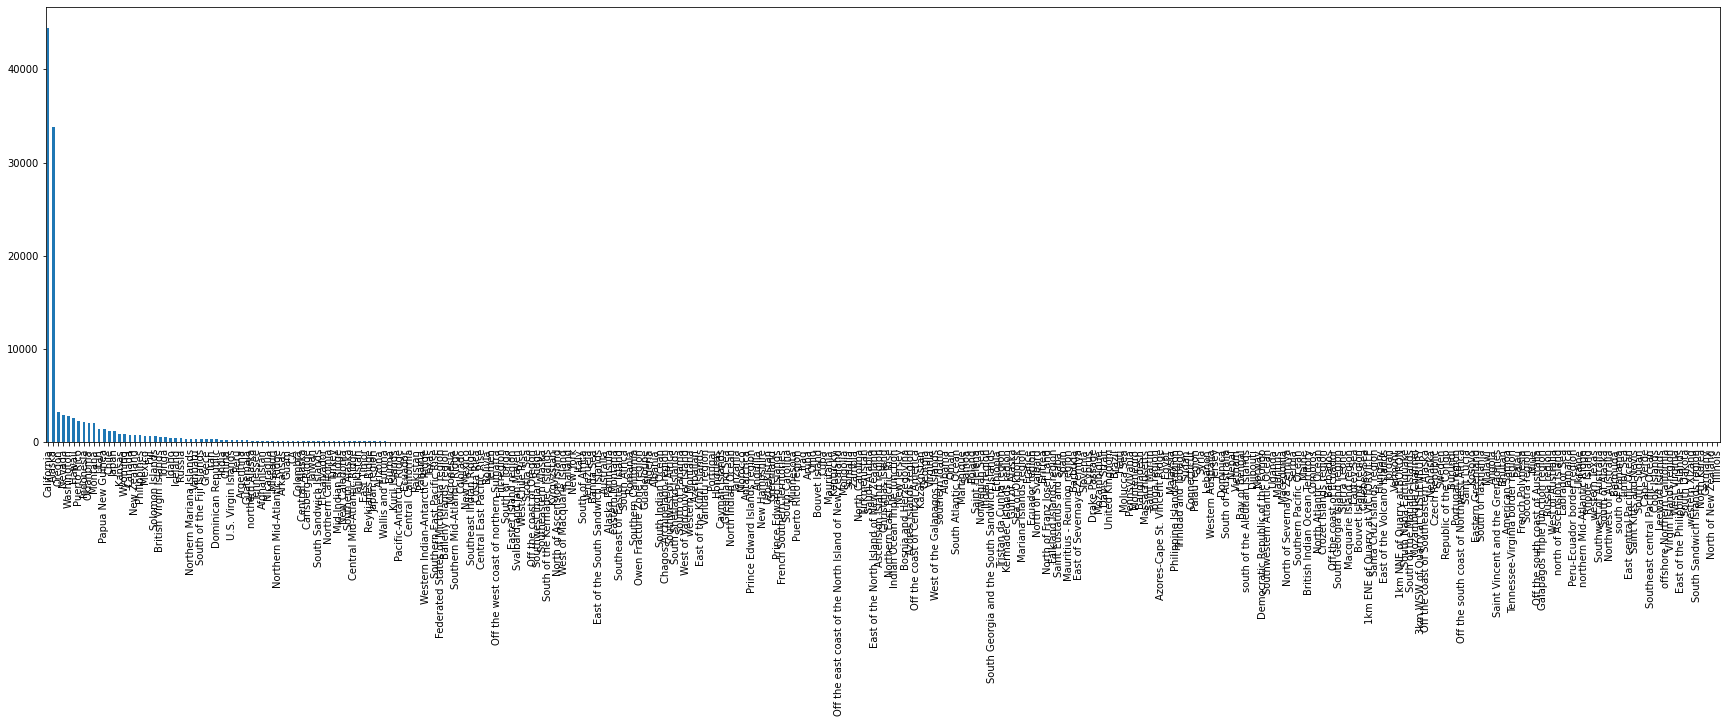

In [113]:
# Make a bar chart of this number 
fig, ax = plt.subplots(1,1, figsize=(30,8))
df['country'].value_counts().plot(kind='bar')

**Q10) Make a histogram for the distribution of the earthquakes' magnitudes**

Hint: `Pandas` has a histogram function documented [at this link](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.hist.html) and `Matplotlib` has one documented [at this link](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html)

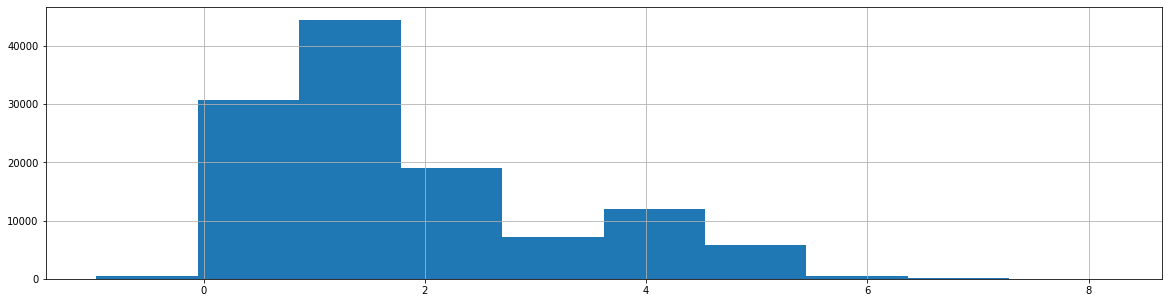

In [116]:
# Make the histogram
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(20,5))
df['mag'].hist()

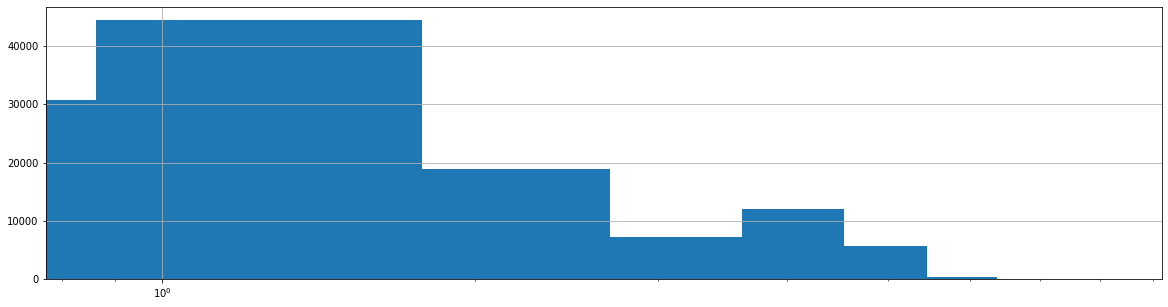

In [117]:
# Use a logarithmic scale
fig, ax = plt.subplots(1,1, figsize=(20,5))
df['mag'].hist()
plt.xscale('log')

(array([9.235e+03, 6.060e+03, 1.455e+03, 5.010e+02, 1.730e+02, 8.400e+01,
        2.700e+01, 6.000e+00, 4.000e+00, 2.000e+00]),
 array([4.  , 4.42, 4.84, 5.26, 5.68, 6.1 , 6.52, 6.94, 7.36, 7.78, 8.2 ]),
 <a list of 10 Patch objects>)

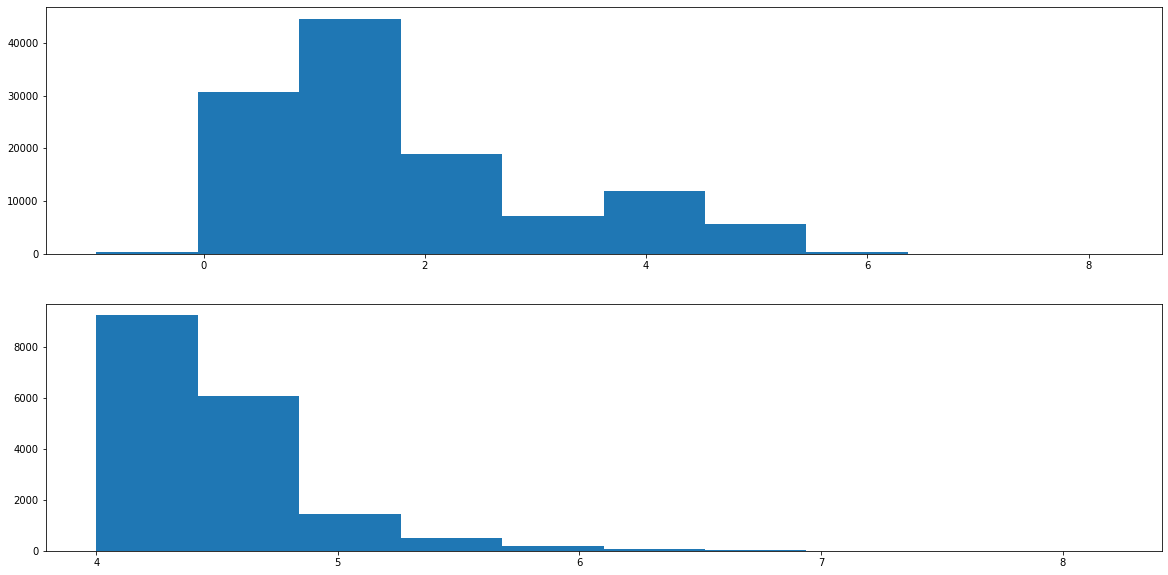

In [124]:
# Make one histogram for the filtered dataset, and one for the unfiltered dataset
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(20,10))
ax1.hist(df['mag'])
ax2.hist(big_eq['mag'])

Do you see a relationship?

**Q11) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude**

Hint: Consider reading the documentation for [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to make the scatter plot and that of [`plt.colorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) to color the points by magnitude. 

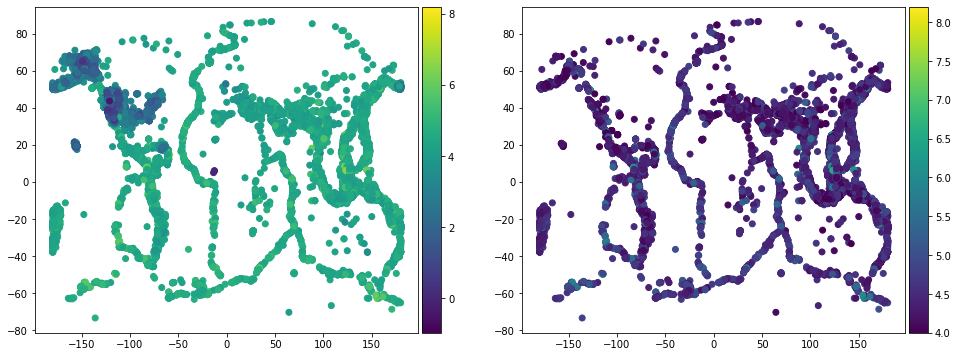

In [132]:
# You can use a two-column subplot with 
# both the filtered/unfiltered datasets
# to facilitate their comparison.
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121)
im1 = ax1.scatter(df['longitude'], df['latitude'], c = df['mag'])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')
ax2 = fig.add_subplot(122)
im2 = ax2.scatter(big_eq['longitude'], big_eq['latitude'], c = big_eq['mag'])
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical');

Do you notice a difference between filtered and unfiltered datasets?
Some deductions can be made by taking a quick look at the two maps. As an example, there are pelnty of observations in the left plot at a place which I presume is the US, whereas the east and center of the US do not include many observations in the right plot. It could be concluded that the earthquakes in the US are more with a low magnitude.